In [1]:
import os
import pandas as pd

In [20]:
#1. reading in the csv file and displaying the first 5 rows
data_dir = os.path.join(os.getcwd(), 'data')
data_file = os.path.join(data_dir, '/Users/emilysun/Downloads/acc_players-2324F.csv')

df_drop = pd.read_csv(data_file, header=0, index_col=0)
#dropping the first row
df = df_drop.drop(index = ('Rk'))
#renaming the columns
df.columns = ["Player", "Class", "Pos","School", "G", "MP", "TRB",
             "AST", "STL", "BLK", "TOV", "PF", "PTS", "FG%", "2P%",
             "3P%", "FT%", "PER", "WS", "BPM"]
df.head()

,Player,Class,Pos,School,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,2,9,10,34,0.262,0.318,0.2,0.615,4.1,-0.1,-6.4
2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,0,1,1,2,0.5,0.5,NaN,NaN,3.5,0,-6.7
3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,4,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,0,1,0,3,0.333,0,1,NaN,1.1,0,-8.2
5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,44,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9


In [21]:
print(df.columns)

Index(['Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'FT%', 'PER', 'WS',
       'BPM'],
      dtype='object')


In [31]:
#2 Basic Analysis pt 1: Calculating the total points scored by all the players combined
#first transform column to type int
df['PTS'] = df["PTS"].astype(int)
#calculate sum 
total_points = df["PTS"].sum()
total_points

38411

In [41]:
#Basic Analysis pt 2: Find the player who has played the most minutes
most_min = df.sort_values(by = 'MP', ascending=False)
most_min.head(1)

,Player,Class,Pos,School,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
179,Ian Schieffelin,JR,F,Clemson,36,989,340,80,21,18,45,95,365,0.564,0.588,0.469,0.731,22.5,4.9,8.8


In [40]:
#Basic Analysis pt 3: Identify the top 5 players in terms of total rebounds
top_trb = df.sort_values(by = 'TRB', ascending = False)
top_trb.head()
#Isaac McKneely, Kevin Miller, Darin Green Jr., Jacob Groves, Tyrese Proctor

,Player,Class,Pos,School,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
125,Isaac McKneely,SO,G,Virginia,33,1068,99,54,19,5,32,48,405,0.409,0.366,0.445,0.847,14.3,3.2,4
131,Kevin Miller,SO,G,Wake Forest,35,1120,98,124,50,1,88,67,545,0.464,0.497,0.369,0.845,19,3.9,4.1
68,Darin Green Jr.,SR,G,Florida State,32,960,97,32,45,3,35,63,363,0.406,0.452,0.38,0.714,12.8,2,3
70,Jacob Groves,SR,G,Virginia,34,690,96,21,17,7,12,68,250,0.45,0.441,0.459,0.621,15.9,2.5,4.1
161,Tyrese Proctor,SO,G,Duke,32,974,96,118,22,3,40,52,335,0.423,0.521,0.352,0.755,14.4,3.3,5.4


In [48]:
#Player Filtering pt 1: new dataframe containing only players who played more than 500 minutes
#first convert column MP to int
df['MP'] = df["MP"].astype(int)
df2 = df[df["MP"] > 500]
df2.head()

,Player,Class,Pos,School,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,4,30,51,164,0.435,0.522,0.147,0.62,9.4,0.9,-1.3
5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,44,13,35,216,0.417,0.563,0.295,0.737,18,2.9,7.9
6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,56,60,100,538,0.54,0.544,0.4,0.781,24.6,6.1,8.9
8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,17,70,43,486,0.443,0.487,0.31,0.754,23.4,4.9,10.5
10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,22,26,58,384,0.434,0.459,0.42,0.842,14.9,2.2,3.3


In [57]:
#Player Filtering pt 2: Using df2 determine the player with highest total assists
highest_ast = df2.sort_values(by = 'AST', ascending = False)
highest_ast.head(1)
#Jalen Warley has the highest total assists

,Player,Class,Pos,School,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
202,Jalen Warley,JR,G,Florida State,33,796,86,92,42,10,36,87,247,0.424,0.434,0.143,0.725,14.3,1.9,2.2


In [58]:
#Player Filtering pt 3: top 3 Assist Leads in the ACC
#using the first dataframe, not the new one with players who played more than 500 minutes
highest_ast_acc = df.sort_values(by = 'AST', ascending = False)
highest_ast_acc.head(3)
#Jalen Warley, Jamir Watkins, Kyle Sturdivant are the top 3 Assist Leads

,Player,Class,Pos,School,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
202,Jalen Warley,JR,G,Florida State,33,796,86,92,42,10,36,87,247,0.424,0.434,0.143,0.725,14.3,1.9,2.2
204,Jamir Watkins,JR,F,Florida State,33,928,199,91,64,26,84,92,514,0.457,0.5,0.344,0.795,24.2,3.9,9.1
190,Kyle Sturdivant,SR,G,Georgia Tech,32,663,67,91,18,3,46,48,283,0.413,0.437,0.385,0.868,16.5,1.8,3.3


In [59]:
#Player Filtering pt 4: Who are the top 3 Shot Blockers
#using the first dataframe
top_blk = df.sort_values(by = 'BLK', ascending = False)
top_blk.head(3)
#Emmanuel Okorafor, De'Ante Green, Armani Mighty

,Player,Class,Pos,School,G,MP,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
149,Emmanuel Okorafor,SO,F,Louisville,20,139,43,1,5,9,4,17,48,0.645,0.645,NaN,0.533,22.9,0.5,4.6
69,De'Ante Green,SO,F,Florida State,31,369,54,12,5,9,24,62,140,0.51,0.58,0.176,0.698,12.8,0.8,-0.8
128,Armani Mighty,SO,C,Boston College,35,197,42,9,4,9,9,36,29,0.409,0.409,NaN,0.478,8.5,0.3,-1.8


In [61]:
#School-Based Analysis pt 1: group the players by school and calculate the total points score by each school
school_totalpts = df.groupby('School')['PTS'].sum()
school_totalpts

School
Boston College    2667
Clemson           2785
Duke              2830
Florida State     2526
Georgia Tech      2272
Louisville        2304
Miami (FL)        2424
NC State          3101
North Carolina    3032
Notre Dame        2113
Pittsburgh        2495
Syracuse          2442
Virginia          2140
Virginia Tech     2547
Wake Forest       2733
Name: PTS, dtype: int64

In [64]:
#School-Based Analysis pt 2: group the players by school and calculate the total assists for each school
#first convert assist column to int
df['AST'] = df['AST'].astype("int")
school_totalast = df.groupby('School')['AST'].sum()
school_totalast

School
Boston College    509
Clemson           533
Duke              551
Florida State     406
Georgia Tech      425
Louisville        356
Miami (FL)        454
NC State          536
North Carolina    536
Notre Dame        335
Pittsburgh        452
Syracuse          442
Virginia          509
Virginia Tech     514
Wake Forest       429
Name: AST, dtype: int64

In [72]:
#School-Based Analysis pt 3: sort the schools by total points score and display the top 3 schools
school_highestpts = df[['School', 'PTS']].sort_values(by ='PTS', ascending = False)
school_highestpts.head(3)
#North Carolina, NC State, Clemson

,School,PTS
43,North Carolina,784
82,NC State,677
71,Clemson,659


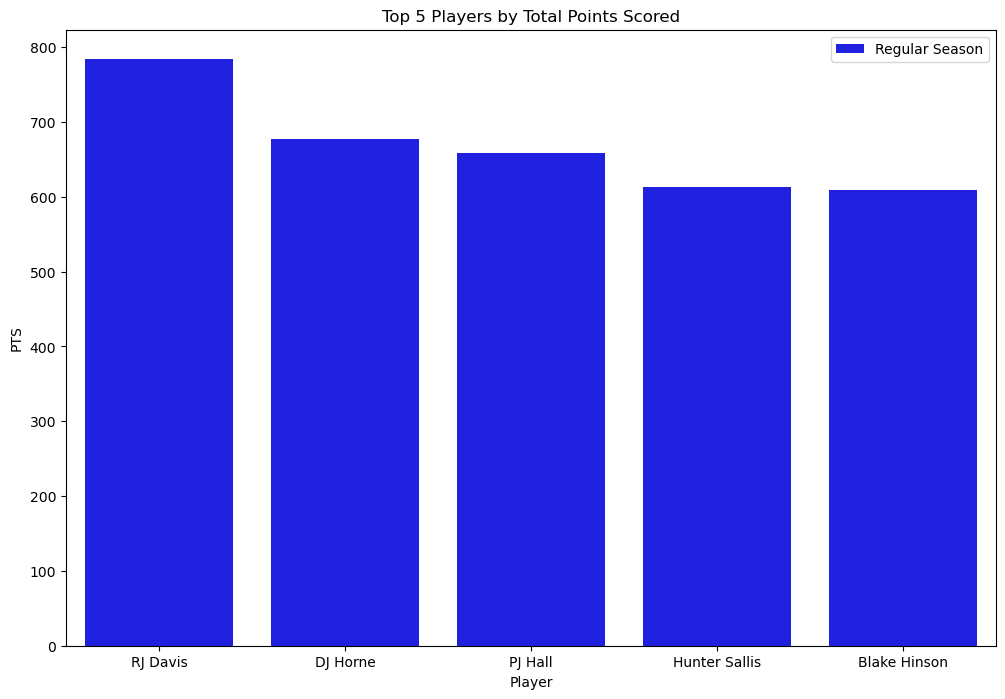

In [82]:
#Extra Credit pt 1
#Create a bar chart showing the top 5 players by total points scored
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))

top5_points = df[['Player','PTS']].sort_values(by = 'PTS', ascending = False).head()


# Plot top 5 players by total points scored
sns.barplot(x='Player', y='PTS', data=top5_points, color="b", label="Regular Season")
plt.title('Top 5 Players by Total Points Scored')
plt.legend()
plt.show()

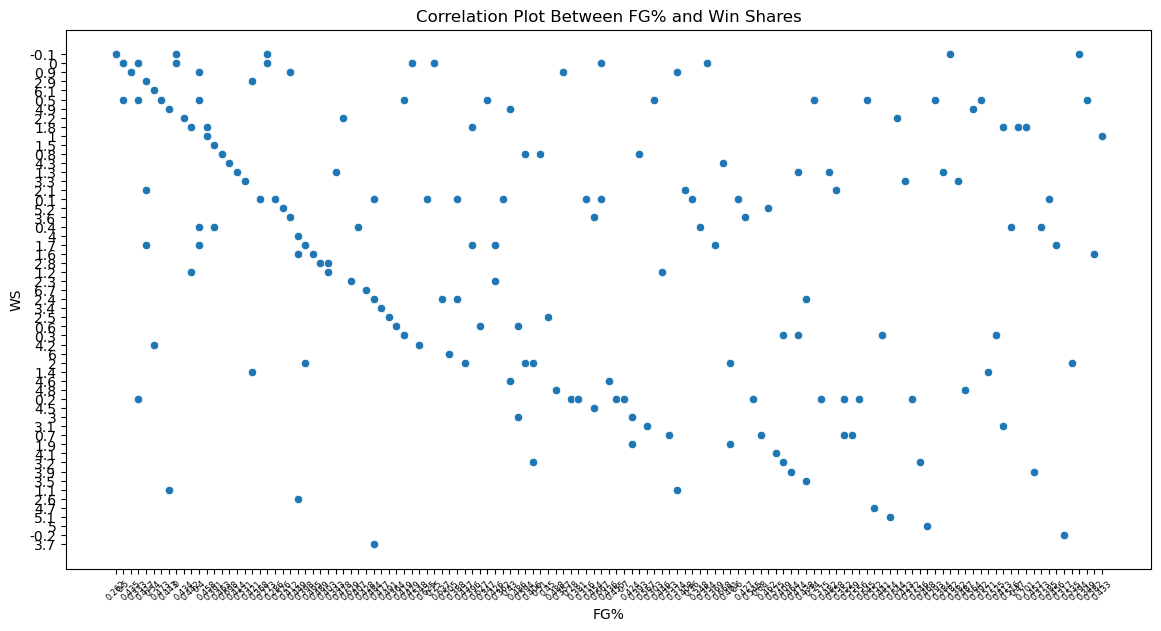

In [93]:
#Extra credit pt 2
#correlation plot between a player's fg% and ws
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.scatterplot(x="FG%", y="WS", data=df)

plt.xticks(rotation=45, fontsize=6) 
plt.title("Correlation Plot Between FG% and Win Shares")
plt.show()

In [98]:
#Extra Credit pt 2
#calculate correlation coefficient
#first convert columns to type float
df['WS'] = df['WS'].astype('float')
df['FG%'] = df['FG%'].astype('float')
print(df['FG%'].corr(df['WS']))

0.4210663894199781


Assignment Reflection

I learned how to read in a csv file, as well as new data filtering techniques. Reading and analyzing in csv files is important when dealing with large amounts of data. While this dataset did not require a lot of cleaning (such as null or missing values), I liked learning how the pre-processing part of data science works and why it is important. I was able to apply pandas techniques like subsetting and analyzing data which will be useful in future data analysis projects, especially with real-world datasets. Learning how to read in and performing initial analysis will benefit me in those situations in the future. 
The most challenging aspect of this assignment was reading the data in and changing the column names. When looking at the dataset initially, a lot of the columns were called "Unnamed: x" and the column names had become part of the dataset as the first row. Figuring out how to drop and rename rows was a little challenging. I was able to work through this by reading the pandas documentation as well as the lecture handouts relating to these analysis techniques. 
The data techniques used in this assignment can be applied to other fields like business and healthcare. Filtering data will be relevant in any field, as companies and industries will be interested in identifying what is performing well and what is not. For example, in business, techniques like data analysis will be used to identify top-performing products or customers to help forecast future production costs. Additionally, a lot of the data in the real-world will be complex and messy, so learning how to clean data and perform pre-processing techniques will be applicable to any future data science challenges. 